In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
house = df[["price", "sqft_living"]]

In [9]:
house.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [7]:
corr = house.corr()
corr
# 확인해보면 상관계수가 0.7로 높은 상관성을 가지고 있는것을 알수있음(선형성)

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [15]:
X = house[["sqft_living"]] # X 값에는 컬럼명이 나오도록 컬럼명
y = house["price"] # y 값에는 시리즈형식

In [16]:
from statsmodels.formula.api import ols

# 단순 선형회귀 적합

lr = ols("price ~ sqft_living", data = house).fit()

In [17]:
lr.params

Intercept     -43580.743094
sqft_living      280.623568
dtype: float64

In [18]:
y_pred = lr.predict(X)
y_pred

0        287555.067025
1        677621.826402
2        172499.404187
3        506441.449985
4        427866.850973
             ...      
21608    385773.315789
21609    604659.698749
21610    242655.296161
21611    405416.965541
21612    242655.296161
Length: 21613, dtype: float64

In [19]:
resid = y- y_pred # 표본에서 실제값 - 예측값(잔차)

In [21]:
# mse

mse = (resid**2).sum()/len(y)
mse

68351286833.03982

In [23]:
#rmse

rmse = np.sqrt((resid**2).sum())/len(y)
rmse

1778.344192252854

In [27]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:41:06   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'price')

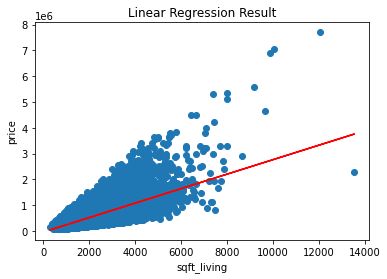

In [33]:
plt.scatter(X, y) #관측값
plt.plot(X, y_pred, color = "red") #예측값을 회귀선으로 나타냄
plt.title("Linear Regression Result")
plt.xlabel("sqft_living")
plt.ylabel("price")

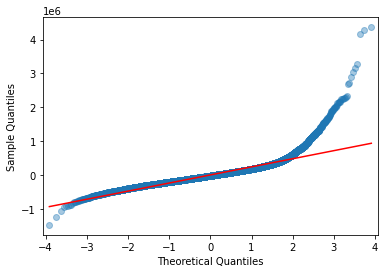

In [45]:
# Q-Q plot
# 잔차가 정규분포(정규성)을 따르는지 확인

import statsmodels.api as sm

sm.qqplot(resid, line = "r", alpha = 0.4)
plt.show() # 

ADP 시험이라 가정하고 정규성과 등분산성이 만족한다는 가정하에 설명

1) 독립변수는 sqrt_living 이며 종속변수는 price 이다
2) F-통계량은  2.100e+04 이며 0.05보다 매우 작기 때문에 추정된 회귀모형이 통계적으로 유의하다고 할수 있다.

3) 결정계수는 0.493으로 이 회귀모형의 데이터에 대한 설명력은 49.3% 이다
4) 회귀식은 Price = sqft_living * 280.6236 - 43580.743094 와 같이 도출할수 있다

#### 다중회귀분석

In [76]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [79]:
df = df.drop(["id", "date"], axis = 1)

In [84]:
ols_str = "price ~"

for i in df.columns.drop("price"):
    ols_str = ols_str + i + " +"
   
ols_str = ols_str[:-2]

In [85]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula = ols_str, data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:57:35   Log-Likelihood:            -2.9458e+05
No. Observations:               21611   AIC:                         5.892e+05
Df Residuals:                   21593   BIC:                         5.893e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.73e+06   2.93e+06      2.296      0.022    9.84e+05    1.25e+07
bedrooms      -3.579e+04   1892.146    -18.914      0.000   -3.95e+04   -3.21e+04
bathrooms      4.113e+04   3253.895     12.639      0.000    3.47e+04    4.75e+04
sqft_living     110.4977      2.270     48.671      0.000     106.048     114.948
sqft_lot          0.1285      0.048      2.682      0.007       0.035       0.222
floors         6697.3438   3596.011      1.862      0.063    -351.104    1.37e+04
waterfront      5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
view           5.286e+04   2140.144     24.698      0.000    4.87e+04    5.71e+04
condition      2.636e+04   2351.623     11.211      0.000    2.18e+04     3.1e+04
grade          9.589e+04   2152.847     44.539      0.000    9.17e+04       1e+05
sqft_above       70.7753      2.254     31.405      0.000      66.358      75.193
sqft_basement    39.7185      2.647     15.004      0.000      34.530      44.907
yr_built      -2620.6943     72.664    -36.066      0.000   -2763.121   -2478.268
yr_renovated     19.7942      3.656      5.415      0.000      12.629      26.960
zipcode        -582.8128     32.989    -17.667      0.000    -647.473    -518.153
lat            6.028e+05   1.07e+04     56.150      0.000    5.82e+05    6.24e+05
long          -2.147e+05   1.31e+04    -16.348      0.000    -2.4e+05   -1.89e+05
sqft_living15    21.6583      3.448      6.282      0.000      14.900      28.416
sqft_lot15       -0.3828      0.073     -5.224      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18380.066   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1867115.072
Skew:                           3.565   Prob(JB):                         0.00
Kurtosis:                      47.974   Cond. No.                     1.37e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 다중공선성 실습

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv("cars93.csv")

In [98]:
df.head()

df.drop("Unnamed: 0", axis = 1, inplace = True)

In [99]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [130]:
df["Price"].head(10)

0    15.9
1    33.9
2    29.1
3    37.7
4    30.0
5    15.7
6    20.8
7    23.7
8    26.3
9    34.7
Name: Price, dtype: float64

In [102]:
# 독립변수로는 엔진사이즈, RPM, Weight, Length 를 사용

new_df = df[["EngineSize", "RPM","Weight","Length"]]
new_df.head()

,EngineSize,RPM,Weight,Length
EngineSize,1.000000,-0.547898,0.845075,0.780283
RPM,-0.547898,1.000000,-0.427931,-0.441249
Weight,0.845075,-0.427931,1.000000,0.806274
Length,0.780283,-0.441249,0.806274,1.000000


In [103]:
new_df.corr() #상관계수 확인, 만약 0.9 이상이면 다중공선성이 있다고 볼수있음

,EngineSize,RPM,Weight,Length
EngineSize,1.000000,-0.547898,0.845075,0.780283
RPM,-0.547898,1.000000,-0.427931,-0.441249
Weight,0.845075,-0.427931,1.000000,0.806274
Length,0.780283,-0.441249,0.806274,1.000000


In [104]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [110]:
# 독립변수 컬럼 추출
ols_feature = "Price ~"
for i in new_df.columns:
    ols_feature = ols_feature + " " +i + " +"
    
ols_feature = ols_feature[:-1]

In [112]:
model = smf.ols(formula = ols_feature, data = df)
result = model.fit()
result.summary() #length 는 유의하지 않은걸로 나옴

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     28.34
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           3.93e-15
Time:                        18:14:21   Log-Likelihood:                -303.89
No. Observations:                  93   AIC:                             617.8
Df Residuals:                      88   BIC:                             630.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -45.4934     14.654     -3.104      0.003     -74.616     -16.371
EngineSize     4.5091      1.381      3.266      0.002       1.765       7.253
RPM            0.0070      0.001      5.139      0.000       0.004       0.010
Weight         0.0079      0.002      3.255      0.002       0.003       0.013
Length        -0.0457      0.083     -0.550      0.584      -0.211       0.120
==============================================================================
Omnibus:                       62.028   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.003
Skew:                           2.067   Prob(JB):                     2.22e-77
Kurtosis:                      11.602   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* VIF 구하기

In [118]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
Y, X = dmatrices(ols_feature, data = df, return_type = "dataframe") 

Y # 회귀식의 Y(예측값 추출)

,Price
0,15.9
1,33.9
2,29.1
3,37.7
4,30.0
...,...
88,19.7
89,20.0
90,23.3
91,22.7


In [129]:
X #독립변수의 회귀값

,Intercept,EngineSize,RPM,Weight,Length
0,1.0,1.8,6300.0,2705.0,177.0
1,1.0,3.2,5500.0,3560.0,195.0
2,1.0,2.8,5500.0,3375.0,180.0
3,1.0,2.8,5500.0,3405.0,193.0
4,1.0,3.5,5700.0,3640.0,186.0
...,...,...,...,...,...
88,1.0,2.5,4500.0,3960.0,187.0
89,1.0,2.0,5800.0,2985.0,180.0
90,1.0,2.8,5800.0,2810.0,159.0
91,1.0,2.3,5400.0,2985.0,190.0


In [137]:
vif_list = []

for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
    
vif_list

[[4.427251654464432, 'EngineSize'],
 [1.4444465912486606, 'RPM'],
 [4.378638493452148, 'Weight'],
 [3.1822925492065623, 'Length']]

In [139]:
pd.DataFrame(data = vif_list, columns = ["VIF","Variable"])

,VIF,Variable
0,4.427252,EngineSize
1,1.444447,RPM
2,4.378638,Weight
3,3.182293,Length
